# IBM Employee Attrition Prediction
## By **[Deeksha Sureka](https://www.linkedin.com/in/deeksha-sureka-602b29136/)**

#  **Problem Statement**

### **Employee Attrition is a common problem in every organization, and this sometimes leads to great resource and opportunity loss. Being able to identify employees who may leave the organization will help the HR department in better planning and allocation of resources.**

### **In this particular problem, it is equally important to minimize both False Positives and False Negatives because the organization would not want to extend additional support to the employees who are planning to leave the organization anytime soon. It would also not want to unnecessarily penalize employees who have no plans of leaving the organization.**

## Table of Content
1. **[Importing Libraries and Dataset](#a)**
2. **[Basic Data Investigation](#b)**
3. **[Data Visualization](#c)**
4. **[Statistical Analysis for Feature Selection](#d)**
5. **[Data Cleaning and Transformation](#e)**
6. **[Final Feature Selection Using RFECV](#f)**
7. **[Applying Classification Models and Evaluating Performance](#g)**
8. **[Ensemble Techiniques for Model Tuning](#h)**
9. **[Model Performance in a Nutshell](#i)**
10. **[Inferences](#j)**

## Data Dictionary

**AGE**	Numerical Value

**ATTRITION**	Employee leaving the company (0=no, 1=yes)

**BUSINESS TRAVEL**	(1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)

**DAILY RATE**	Numerical Value - Salary Level

**DEPARTMENT**	(1=HR, 2=R&D, 3=Sales)

**DISTANCE FROM HOME**	Numerical Value - THE DISTANCE FROM WORK TO HOME

**EDUCATION**	Numerical Value

**EDUCATION FIELD**	(1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL)

**EMPLOYEE COUNT**	Numerical Value

**EMPLOYEE NUMBER**	Numerical Value - EMPLOYEE ID

**ENVIROMENT SATISFACTION**	Numerical Value - SATISFACTION WITH THE ENVIROMENT

**GENDER**	(1=FEMALE, 2=MALE)

**HOURLY RATE**	Numerical Value - HOURLY SALARY

**JOB INVOLVEMENT**	Numerical Value - JOB INVOLVEMENT

**JOB LEVEL**	Numerical Value - LEVEL OF JOB

**JOB ROLE**	(1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE)

**JOB SATISFACTION**	Numerical Value - SATISFACTION WITH THE JOB

**MARITAL STATUS**	(1=DIVORCED, 2=MARRIED, 3=SINGLE)

**MONTHLY INCOME**	Numerical Value - MONTHLY SALARY

**MONTHY RATE**	Numerical Value - MONTHY RATE

**NUMCOMPANIES WORKED**	Numerical Value - NO. OF COMPANIES WORKED AT

**OVER 18**	(1=YES, 2=NO)

**OVERTIME**	(1=NO, 2=YES)

**PERCENT SALARY HIKE**	Numerical Value - PERCENTAGE INCREASE IN SALARY

**PERFORMANCE RATING**	Numerical Value - ERFORMANCE RATING

**RELATIONS SATISFACTION**	Numerical Value - RELATIONS SATISFACTION

**STANDARD HOURS**	Numerical Value - STANDARD HOURS

**STOCK OPTIONS LEVEL**	Numerical Value - STOCK OPTIONS

**TOTAL WORKING YEARS**	Numerical Value - TOTAL YEARS WORKED

**TRAINING TIMES LAST YEAR**	Numerical Value - HOURS SPENT TRAINING

**WORK LIFE BALANCE**    Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE

**YEARS AT COMPANY**	Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY

**YEARS IN CURRENT ROLE**	Numerical Value -YEARS IN CURRENT ROLE

**YEARS SINCE LAST PROMOTION**	Numerical Value - LAST PROMOTION

**YEARS WITH CURRENT MANAGER**	Numerical Value - YEARS SPENT WITH CURRENT MANAGER

<a id="a"> </a>
## Importing Libraries and Dataset

In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict, cross_val_score
import scipy.stats as stats
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, matthews_corrcoef, roc_auc_score, confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [399]:
dataset = pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
dataset.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<a id="b"> </a>
## Basic Data Investigation

In [400]:
dataset.shape

(1470, 35)

In [401]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [402]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [403]:
dataset.describe(include = 'object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [404]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [405]:
dataset.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

<a id="c"> </a>
## Data Visualization

### Attrition in Various Categories(Absolute Terms)

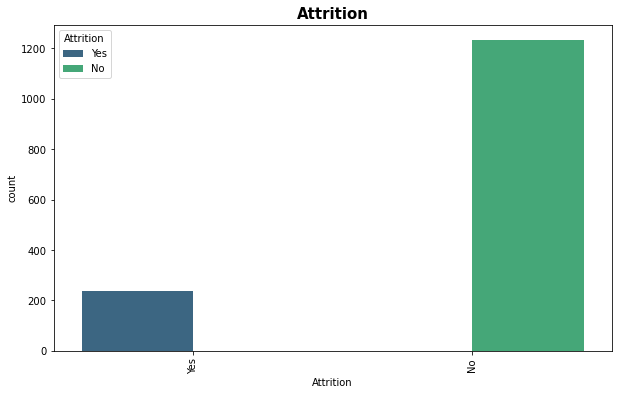

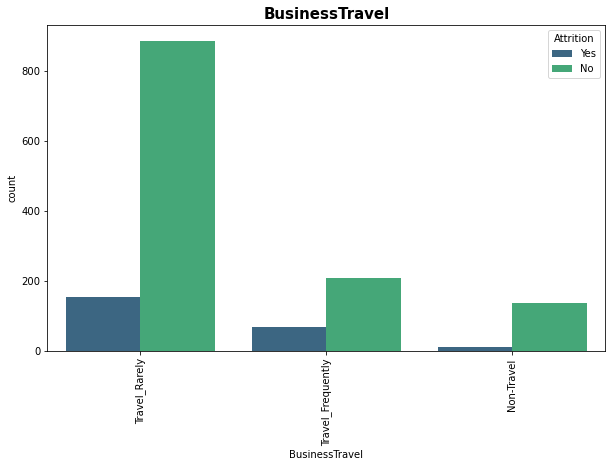

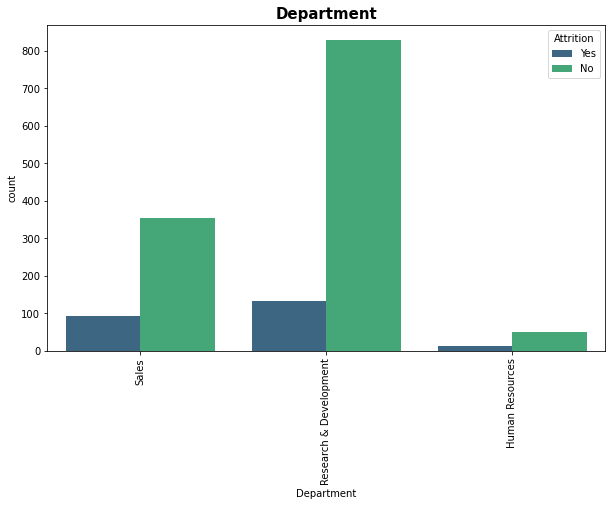

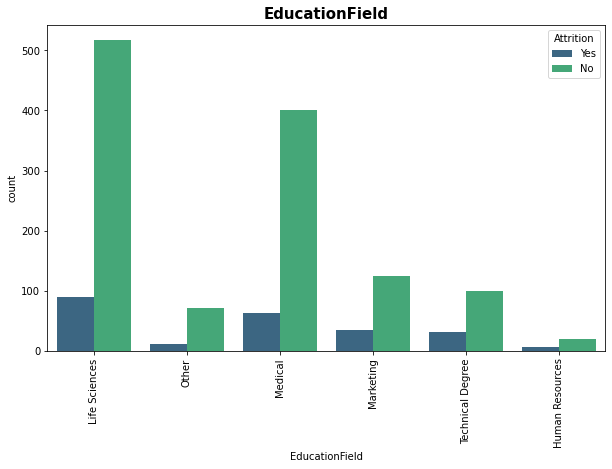

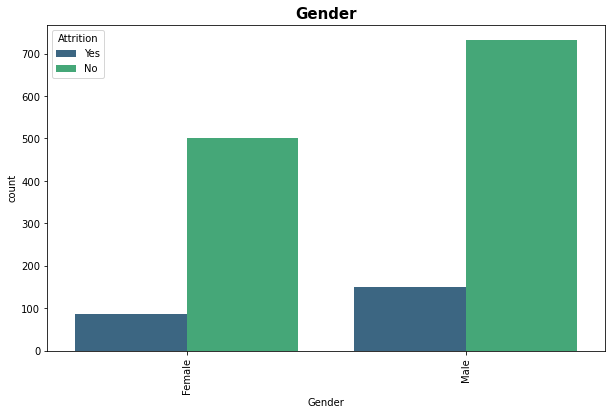

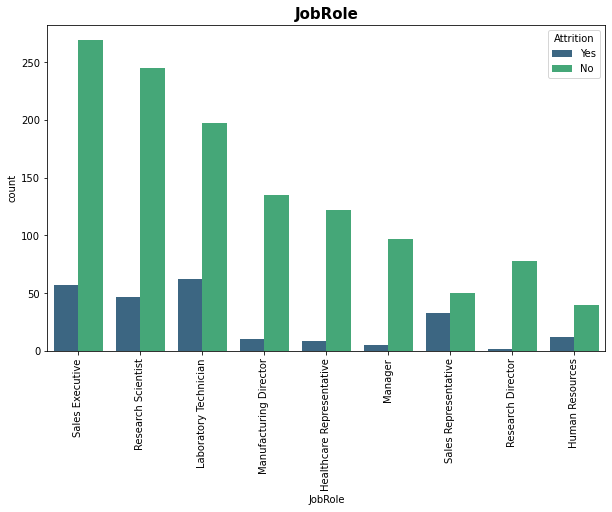

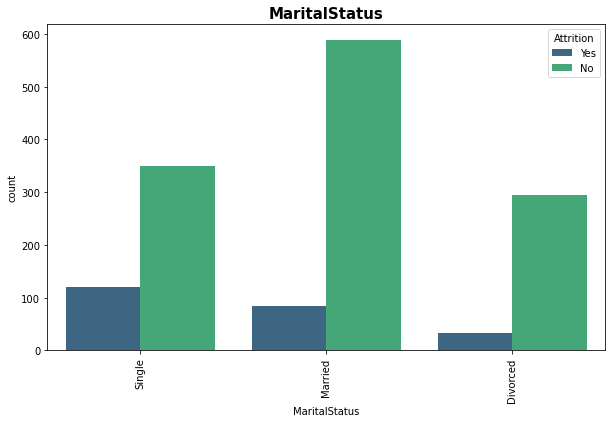

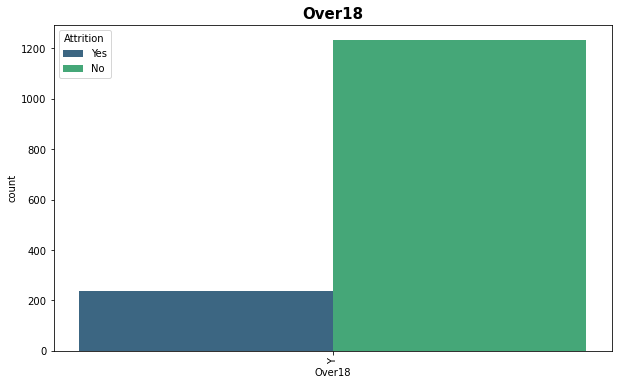

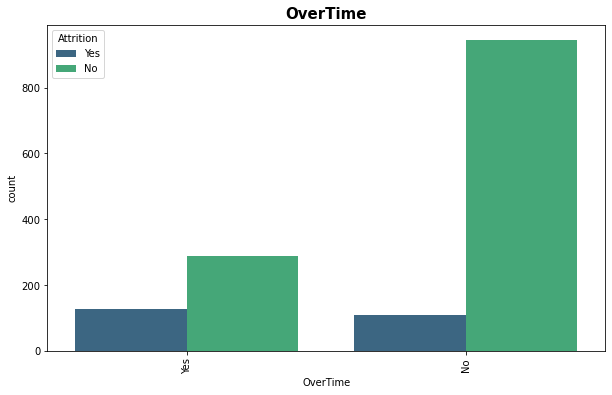

In [406]:
cat_cols = dataset.select_dtypes(include = 'object')
for x in cat_cols.columns:
    plt.figure(figsize = (10,6))
    sns.countplot(dataset[x],hue = dataset['Attrition'],palette = 'viridis')
    plt.xticks(rotation = 90)
    plt.title(x,fontweight='bold',size=15)
    plt.show()

### Percentage Contribution to Attrition

In [407]:
dataset['Attrition'] = dataset['Attrition'].replace({'Yes':1,'No':0})

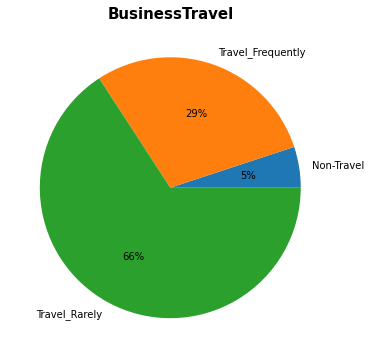

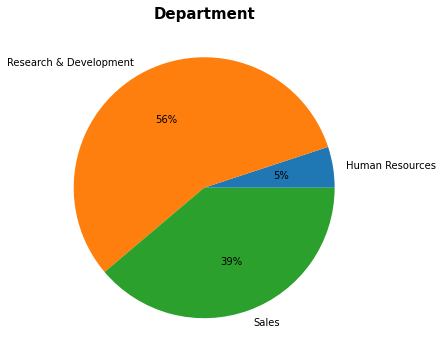

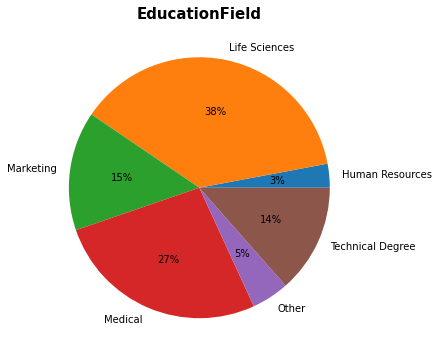

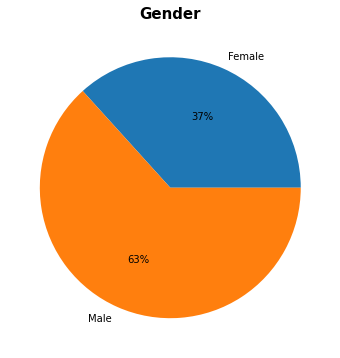

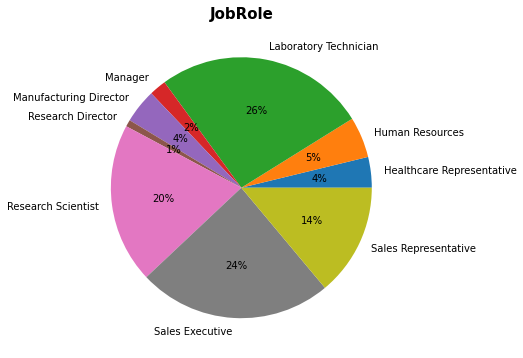

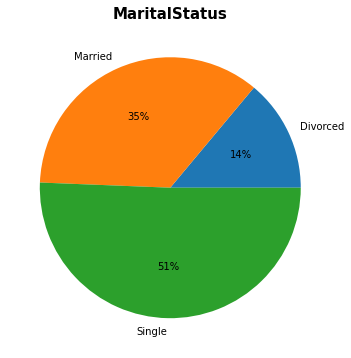

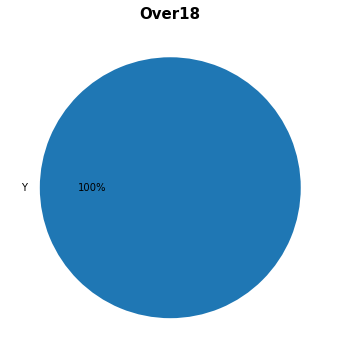

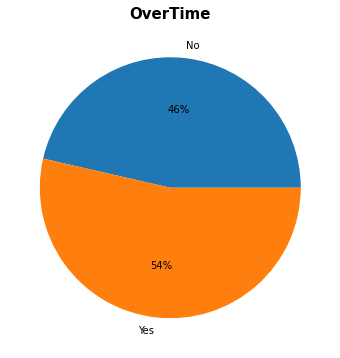

In [408]:
cat_cols = dataset.select_dtypes(include = 'object')
for x in cat_cols.columns:
    z = pd.crosstab(dataset[x],dataset['Attrition'])
    plt.figure(figsize = (10,6))
    plt.pie(z[1], labels = z.index, autopct='%1.0f%%')
    plt.title(x,fontweight='bold',size=15)
    plt.show()

### Attrition Percentage Within Categories

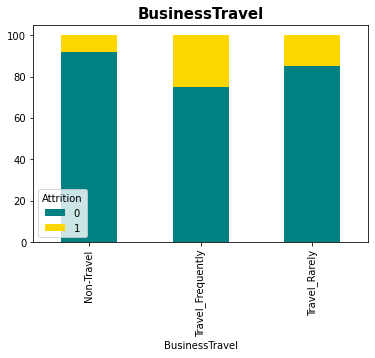

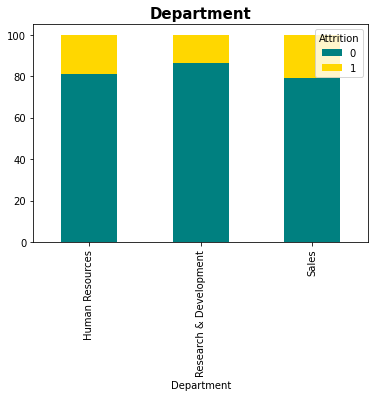

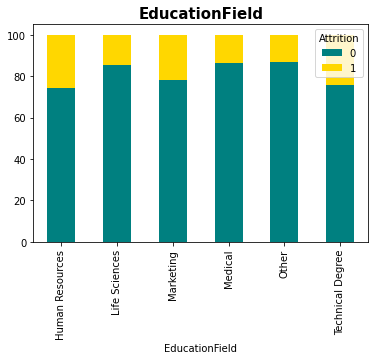

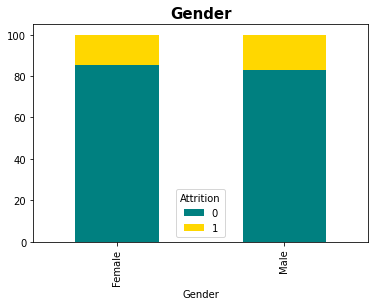

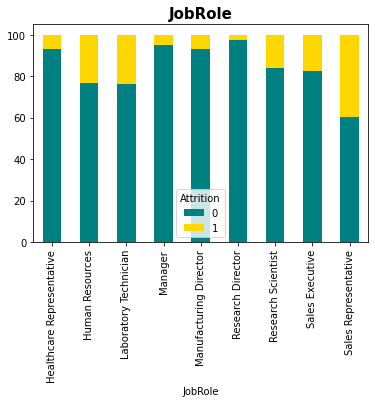

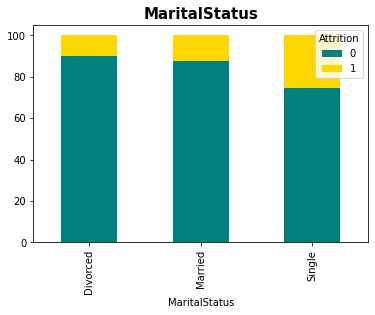

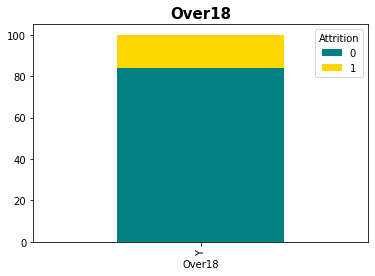

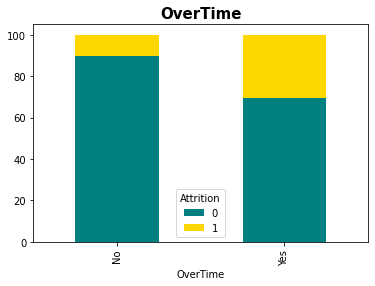

In [409]:
cat_cols = dataset.select_dtypes(include = 'object')
for x in cat_cols.columns:
    z = pd.crosstab(dataset[x],dataset['Attrition'])
    z['Sum'] = z.T.sum().values
    for i in z.columns:
        z[i] = (z[i]/z['Sum'])*100
    z.drop('Sum',1,inplace = True)
    z.plot(kind = 'bar', stacked = True, color = ['teal','gold'])
    plt.title(x,fontweight='bold',size=15)
    plt.show()

### Attrition Vs Numerical Features

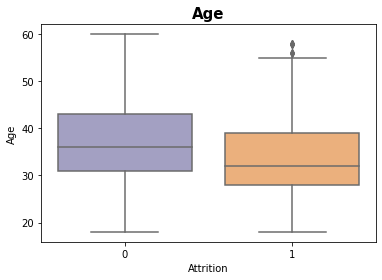

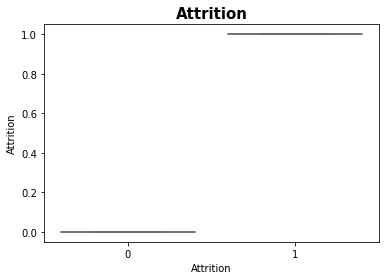

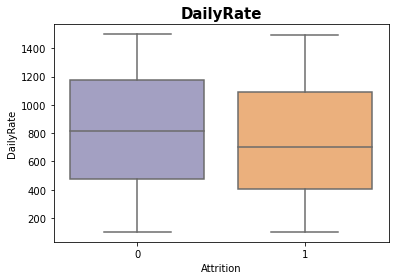

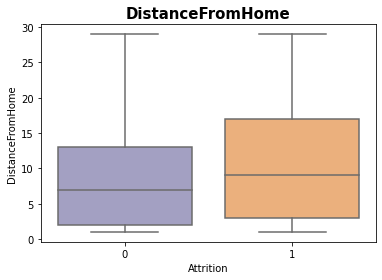

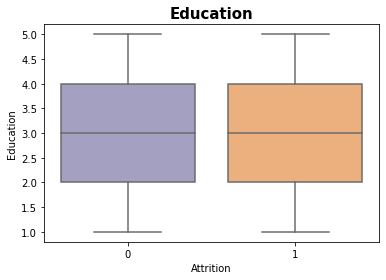

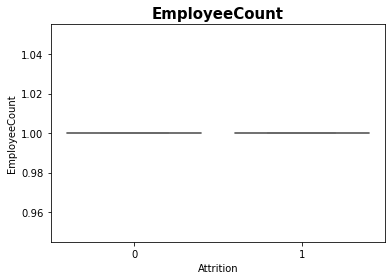

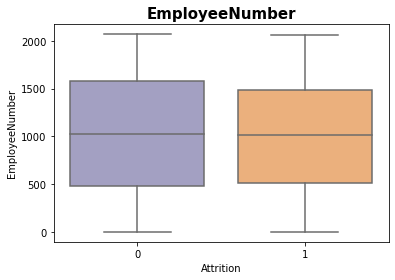

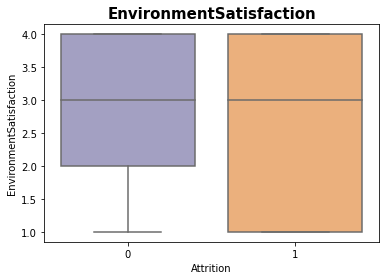

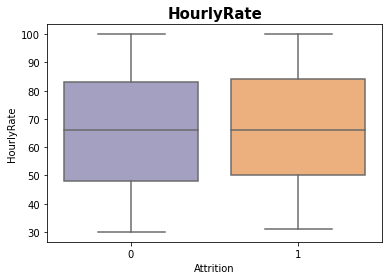

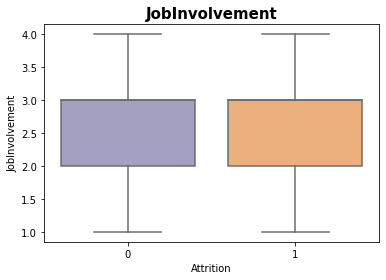

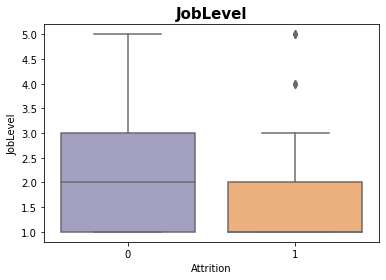

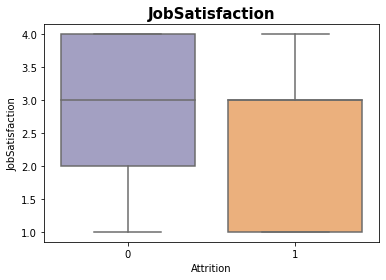

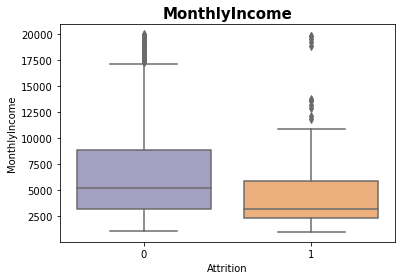

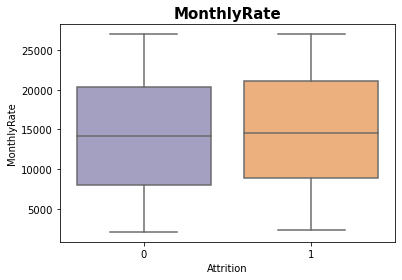

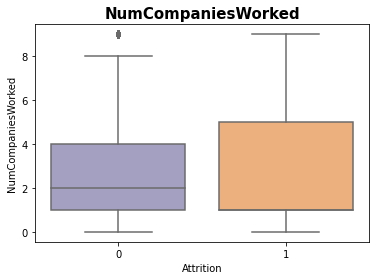

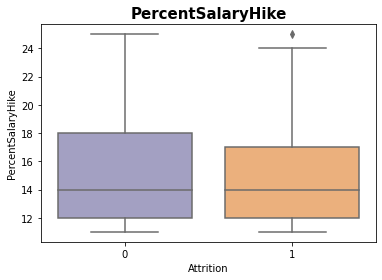

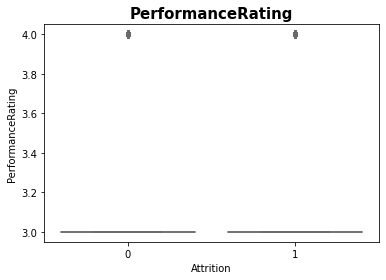

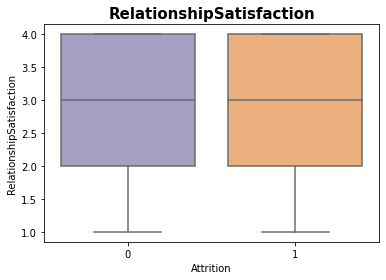

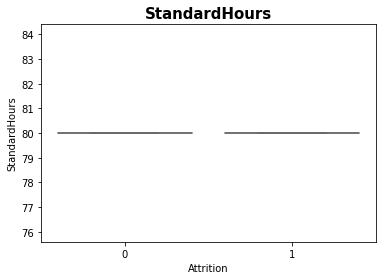

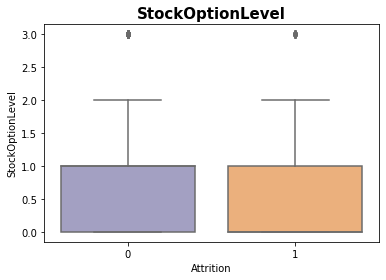

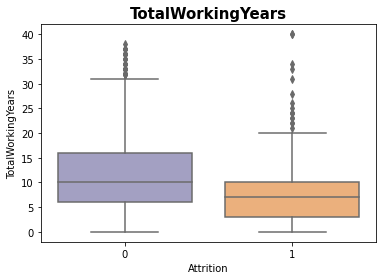

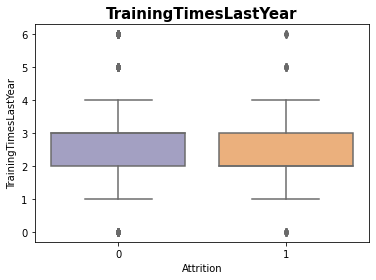

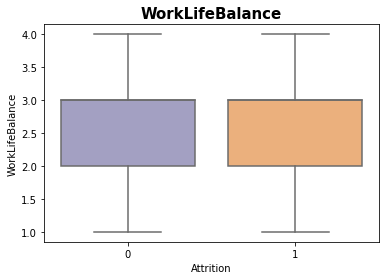

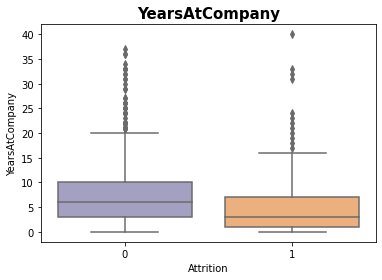

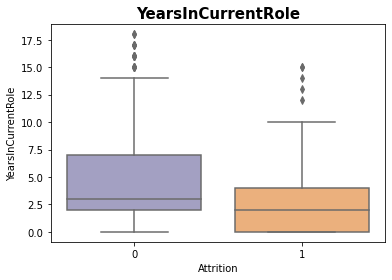

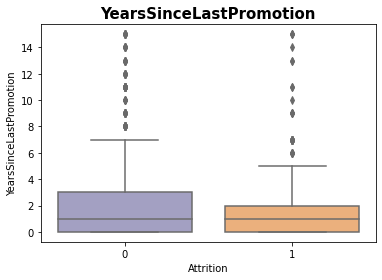

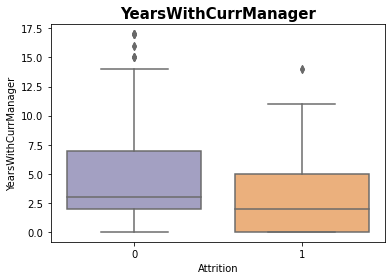

In [410]:
num_col = dataset.select_dtypes(exclude = 'object')
for y in num_col.columns:
    sns.boxplot(dataset['Attrition'],dataset[y],palette = 'tab20c_r')
    plt.title(y,fontweight='bold',size=15)
    plt.show()

### Correlation Heatmap

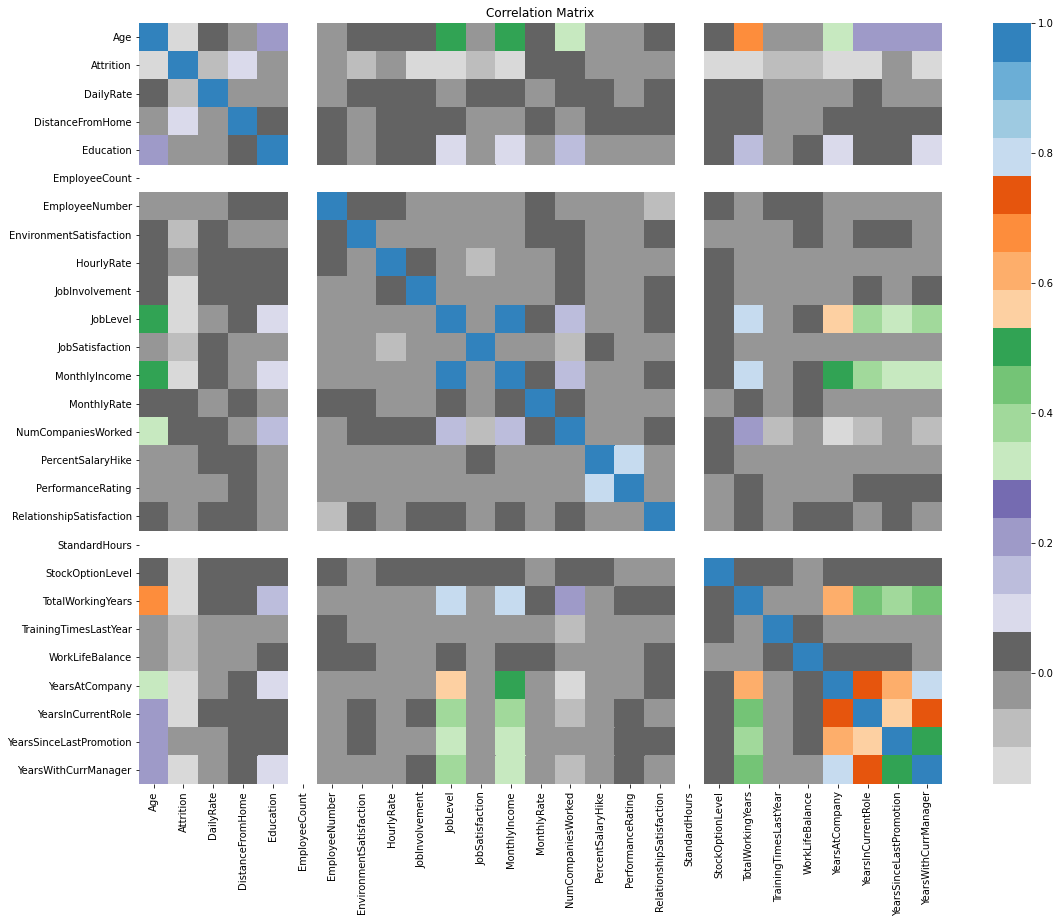

In [411]:
correlation_matrix = dataset.corr()
plt.figure(figsize = (18,14))
sns.heatmap(correlation_matrix,cmap = 'tab20c_r')
plt.title('Correlation Matrix')
plt.show()

### Inference from Heatmap
The target column has weak to no correlation with the input features. This means none of these input columns would be contributing much to the final predictions and this could be a possible reason that our machine learning models dont perform well.

## Dropping Columns with 1 or all unique values

In [412]:
dataset.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'],1,inplace = True)

<a id="d"> </a>
## **Statistical Analysis for Feature Selection**

In [413]:
num_col = dataset.select_dtypes(exclude = 'object')
features_to_drop = []
features_to_transform = []
for y in num_col.columns:
    value_0 = dataset[dataset['Attrition']==0][y]
    value_1 = dataset[dataset['Attrition']==1][y]
    ttest_ind = stats.ttest_ind(value_1,value_0)
    mann_whitney_u = stats.mannwhitneyu(value_1,value_0)
    if ttest_ind[1]>0.05 and mann_whitney_u[1]>0.05:
        features_to_drop.append(y)
    elif ttest_ind[1]>0.05 and mann_whitney_u[1]<0.05:
        features_to_transform.append(y)
    else:
        continue

In [414]:
cat_col = dataset.select_dtypes(include = 'object')
for y in cat_col.columns:
    crosstab_matrix = pd.crosstab(dataset[y],dataset['Attrition'])
    test_stat, pvalue, DOF, expected_value = stats.chi2_contingency(crosstab_matrix)
    if pvalue>0.05:
        features_to_drop.append(y)
    else:
        continue

<a id="e"> </a>
## Data Cleaning and Transformation

In [415]:
dataset.drop(features_to_drop,1,inplace = True)

In [416]:
dataset['YearsSinceLastPromotion']= np.power(dataset[features_to_transform],0.3)

In [417]:
X = dataset.drop('Attrition',1)
y = dataset['Attrition']

In [418]:
categorical_X = X.select_dtypes(include = 'object')
numerical_X = X.select_dtypes(exclude = 'object')

In [419]:
lb = LabelEncoder()
X1 = pd.DataFrame()
for x in range(categorical_X.shape[1]):
    label_X = lb.fit_transform(categorical_X.iloc[:,x])
    X1[categorical_X.columns[x]] = label_X

In [420]:
combined_X = pd.concat([X1,numerical_X],1)
combined_X

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,...,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,2,1,7,2,1,41,1102,1,2,...,4,5993,0,8,0,1,6,4,0.000000,5
1,1,1,1,6,1,0,49,279,8,3,...,2,5130,1,10,3,3,10,7,1.000000,7
2,2,1,4,2,2,1,37,1373,2,4,...,3,2090,0,7,3,3,0,0,0.000000,0
3,1,1,1,6,1,1,33,1392,3,4,...,3,2909,0,8,3,3,8,7,1.390389,0
4,2,1,3,2,1,0,27,591,2,1,...,2,3468,1,6,3,3,2,2,1.231144,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,1,3,2,1,0,36,884,23,3,...,4,2571,1,17,3,3,5,2,0.000000,3
1466,2,1,3,0,1,0,39,613,6,4,...,1,9991,1,9,5,3,7,7,1.000000,7
1467,2,1,1,4,1,1,27,155,4,2,...,2,6142,1,6,0,3,6,2,0.000000,3
1468,1,2,3,7,1,0,49,1023,2,4,...,2,5390,0,17,3,2,9,6,0.000000,8


In [421]:
sc = StandardScaler()
transformed_numeric = sc.fit_transform(combined_X)
transformed_numeric_df = pd.DataFrame(transformed_numeric)
transformed_numeric_df.columns = combined_X.columns

In [422]:
final_dataset = pd.concat([transformed_numeric_df,y],1)
final_dataset.head(5)

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,...,MonthlyIncome,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.590048,1.401512,-0.937414,1.032716,1.236820,1.591746,0.446350,0.742527,-1.010909,-0.660531,...,-0.108350,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-1.131922,0.245834,1
1,-0.913194,-0.493817,-0.937414,0.626374,-0.133282,-0.628241,1.322365,-1.297775,-0.147150,0.254625,...,-0.291719,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,0.253541,0.806541,0
2,0.590048,-0.493817,1.316673,-0.998992,1.236820,1.591746,0.008343,1.414363,-0.887515,1.169781,...,-0.937654,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-1.131922,-1.155935,1
3,-0.913194,-0.493817,-0.937414,0.626374,-0.133282,1.591746,-0.429664,1.461466,-0.764121,1.169781,...,-0.763634,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.794411,-1.155935,0
4,0.590048,-0.493817,0.565311,-0.998992,-0.133282,-0.628241,-1.086676,-0.524295,-0.887515,-1.575686,...,-0.644858,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,0.573784,-0.595227,0


<a id="f"> </a>
## Final Feature Selection using RFECV

In [423]:
X = final_dataset.drop('Attrition',1)
y = final_dataset['Attrition']

In [424]:
logr=LogisticRegression()
rfe=RFECV(logr, scoring = 'f1')
rfe_fe=rfe.fit(X,y)

rfe_rank=pd.DataFrame()
rfe_rank['Feature']=X.columns
rfe_rank['Rank']=rfe_fe.ranking_
rfe_feature=rfe_rank[rfe_rank['Rank']==1]

In [425]:
features = rfe_feature['Feature'].values
final_X = X[features]

## Train Test Split

In [426]:
xtr,xte,ytr,yte = train_test_split(final_X,y,test_size = 0.3, random_state = 46)

<a id="g"> </a>
## Applying Classification Models and Evaluating Performance

In [427]:
# Logistic Regression
logr = LogisticRegression(random_state = 46)
logr.fit(xtr,ytr)

LogisticRegression(random_state=46)

In [428]:
y_pred = logr.predict(xte)
print(classification_report(yte,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       360
           1       0.76      0.35      0.47        81

    accuracy                           0.86       441
   macro avg       0.81      0.66      0.70       441
weighted avg       0.85      0.86      0.84       441



In [429]:
math_logr = matthews_corrcoef(yte,y_pred)
math_logr

0.4478914298918817

In [430]:
mcc_scores = []
mcc_scores.append(math_logr)

In [431]:
confusion_matrix(yte,y_pred)

array([[351,   9],
       [ 53,  28]])

In [432]:
# Regularized Decision Tree
dt = DecisionTreeClassifier(random_state = 46)
params = {'max_depth': np.arange(1,15),'criterion':['entropy','gini']}
gs = GridSearchCV(dt,params,cv = 5)
gs.fit(xtr,ytr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=46),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [433]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [434]:
dt_reg = DecisionTreeClassifier(max_depth = 2, criterion = 'gini')
dt_reg.fit(xtr,ytr)

DecisionTreeClassifier(max_depth=2)

In [435]:
y_pred = dt_reg.predict(xte)
print(classification_report(yte,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       360
           1       0.60      0.26      0.36        81

    accuracy                           0.83       441
   macro avg       0.73      0.61      0.63       441
weighted avg       0.81      0.83      0.80       441



In [436]:
math_dt_reg = matthews_corrcoef(yte,y_pred)
math_dt_reg

0.31568207490098815

In [437]:
mcc_scores.append(math_dt_reg)

In [438]:
confusion_matrix(yte,y_pred)

array([[346,  14],
       [ 60,  21]])

In [439]:
# Random Forest
rf = RandomForestClassifier(random_state = 46)
params = {'n_estimators': np.arange(1,15)}
gs = GridSearchCV(rf,params,cv = 5)
gs.fit(xtr,ytr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=46),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [440]:
gs.best_params_

{'n_estimators': 11}

In [441]:
rf_reg = RandomForestClassifier(n_estimators = 12)
rf_reg.fit(xtr,ytr)


RandomForestClassifier(n_estimators=12)

In [442]:
y_pred = rf_reg.predict(xte)
print(classification_report(yte,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       360
           1       0.68      0.16      0.26        81

    accuracy                           0.83       441
   macro avg       0.76      0.57      0.58       441
weighted avg       0.81      0.83      0.79       441



In [443]:
math_rf = matthews_corrcoef(yte,y_pred)
math_rf

0.27428473640813356

In [444]:
mcc_scores.append(math_rf)

In [445]:
confusion_matrix(yte,y_pred)

array([[354,   6],
       [ 68,  13]])

In [446]:
# K Nearest Neighbors
knn = KNeighborsClassifier()
params = {'n_neighbors':np.arange(1,100), 'weights': ['distance','uniform']}
gs = GridSearchCV(knn,params,cv = 5)
gs.fit(xtr,ytr)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['distance', 'uniform']})

In [447]:
gs.best_params_

{'n_neighbors': 11, 'weights': 'distance'}

In [448]:
knn_tuned = KNeighborsClassifier(n_neighbors = 11, weights = 'distance')
knn_tuned.fit(xtr,ytr)

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [449]:
y_pred = knn_tuned.predict(xte)
print(classification_report(yte,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       360
           1       1.00      0.10      0.18        81

    accuracy                           0.83       441
   macro avg       0.92      0.55      0.54       441
weighted avg       0.86      0.83      0.77       441



In [450]:
math_knn = matthews_corrcoef(yte,y_pred)
math_knn

0.28655618473611927

In [451]:
mcc_scores.append(math_knn)

In [452]:
confusion_matrix(yte,y_pred)

array([[360,   0],
       [ 73,   8]])

<a id="h"> </a>
## Ensemble Techiniques for Model Tuning

In [453]:
#Bagged Logistic Regression
logr = LogisticRegression(random_state = 20)
bagged_logr = BaggingClassifier(logr,random_state = 20)
bagged_logr.fit(xtr,ytr)

BaggingClassifier(base_estimator=LogisticRegression(random_state=20),
                  random_state=20)

In [454]:
y_pred = bagged_logr.predict(xte)
print(classification_report(yte,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       360
           1       0.78      0.38      0.51        81

    accuracy                           0.87       441
   macro avg       0.83      0.68      0.72       441
weighted avg       0.86      0.87      0.85       441



In [455]:
math_bagged_logr = matthews_corrcoef(yte,y_pred)
math_bagged_logr

0.4823141503164258

In [456]:
mcc_scores.append(math_bagged_logr)

In [457]:
confusion_matrix(yte,y_pred)

array([[351,   9],
       [ 50,  31]])

In [458]:
# Boosted Logistic Regression
boosted_logr = AdaBoostClassifier(logr,random_state = 46)
boosted_logr.fit(xtr,ytr)

AdaBoostClassifier(base_estimator=LogisticRegression(random_state=20),
                   random_state=46)

In [459]:
y_pred = boosted_logr.predict(xte)
print(classification_report(yte,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92       360
           1       0.74      0.32      0.45        81

    accuracy                           0.85       441
   macro avg       0.80      0.65      0.68       441
weighted avg       0.84      0.85      0.83       441



In [460]:
math_boosted_logr = matthews_corrcoef(yte,y_pred)
math_boosted_logr

0.4240043555042684

In [461]:
mcc_scores.append(math_boosted_logr)

In [462]:
confusion_matrix(yte,y_pred)

array([[351,   9],
       [ 55,  26]])

In [463]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state = 46)
gb.fit(xtr,ytr)

GradientBoostingClassifier(random_state=46)

In [464]:
y_pred = gb.predict(xte)
print(classification_report(yte,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       360
           1       0.73      0.37      0.49        81

    accuracy                           0.86       441
   macro avg       0.80      0.67      0.71       441
weighted avg       0.85      0.86      0.84       441



In [465]:
math_gboost = matthews_corrcoef(yte,y_pred)
math_gboost

0.45312095246299927

In [466]:
mcc_scores.append(math_gboost)

In [467]:
confusion_matrix(yte,y_pred)

array([[349,  11],
       [ 51,  30]])

<a id="i"> </a>
## Model Performance in a Nutshell

### Evaluation Metric

**The Matthews correlation coefficient (MCC) is said to be a more reliable metric in case of imbalanced dataset because it produces a high score only if the prediction obtains good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.**
**A score of 1 represents perfect predictions and a score of -1 represents opposite predictions.**

**It is calculated as :**
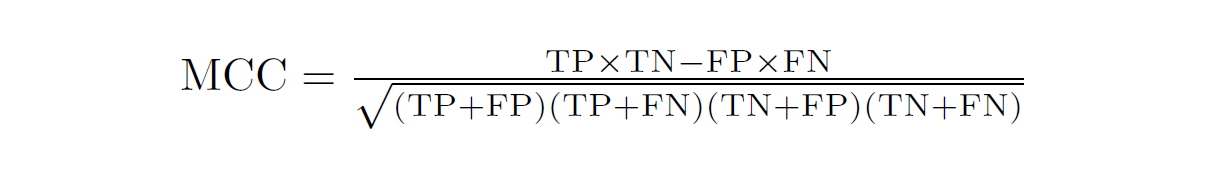

In [468]:
models = ['Logistic Regression','Regularized Decision Tree','Random Forest','K Nearest Neighbors','Bagged Logistic Regression','Boosted Logistic Regression','Gradient Boosting']
results = pd.DataFrame()
results['Matthews correlation coefficient Scores'] = mcc_scores
results.index = models

In [469]:
results

,Matthews correlation coefficient Scores
Logistic Regression,0.447891
Regularized Decision Tree,0.315682
Random Forest,0.274285
K Nearest Neighbors,0.286556
Bagged Logistic Regression,0.482314
Boosted Logistic Regression,0.424004
Gradient Boosting,0.453121


<a id="j"> </a>

## Inferences

Based on the Matthews correlation coefficient Scores, Bagged Logistics Regression is a clear winner. It is equally important to minimimize both False Negatives as well as False Positives and this trade off is best depicted by the Bagged Logistic Regression Model.
According to the Bagged Logistic Model:

True Nagatives = 351

False Positives = 9

True Positives = 31

False Negative = 50

This analysis shows that predicting exact attrition is very difficult however it can be controlled if proper steps are taken to improve employee satisfaction. From the visualizations above, I have identified some reasons that could lead to attrition and they are:
1. Business Travels - It is a business commitment, however, its also very important that we contemplate on finding alternatives to reduce business travels. This would not only cut cost but might also help in lowering the attrition rate.
2. Overtime - Employee Satisfaction dips when they are made to do overtime on a regular basis. Occasional Overtimes are understandable but if happening regularly, thats when the HR team needs to ponder upon the workforce planning and management.
3. Job Role -  38% of the total attrition is caused by Sales Representatives and Sales Executives followed by 26% by Laboratory Technitians. Its very important that the HR team takes regular feedback from the employees in these departments.

